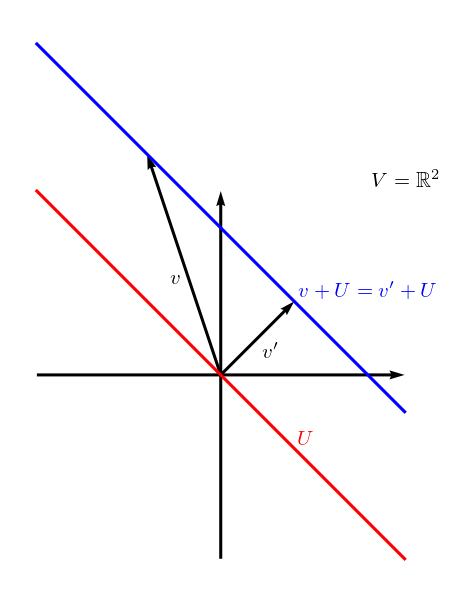

In [54]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np


#there seem to be too many ways to change these rc parameters
plt.rc('text.latex',preamble=r"\usepackage{amsfonts}")

#Ok we've spent an inordinate amount of time on this problem now
#We'll see if this is even better than tikz when we try to do the 3d graphics
#I don't like that all the points are specified numerically instead of being calculated.
plt.rc('mathtext',fontset='cm')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

color1 = 'red'
color2 = 'blue'
faded = 'grey'

field_dim=5
x = np.linspace(-field_dim/2,field_dim/2,100)
fig,ax=plt.subplots(figsize=(field_dim,field_dim), dpi=150)

# Deactivate normal axes
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
plt.xticks([])
plt.yticks([])

ax.set_aspect(1)

def offset_style(horiz=1,vert=1):
    """offset text. the optional parameters define the direction"""
    return dict(xytext=(horiz*2,vert*2),textcoords='offset points')

# Make custom axes with arrows
plt.quiver([0 , -field_dim/2],
           [-field_dim/2,  0],
           [0, field_dim],
           [field_dim,0],angles='xy', scale_units='xy', scale=1)

########## ℝ² annotation
plt.annotate(r"$ V= \mathbb{R}^2 $", (2.0,2.5), **offset_style())

######### Plot SubVSpace
V = lambda x: -x

plt.plot(x, V(x), color=color1)
plt.annotate('$U$', (1,V(1)),color=color1, **offset_style())


######## Affine space
A = lambda x: V(x)+2
plt.plot(x, A(x), c=color2)


####### Support vectors
#x coords for intersection with A
xs=[-1,1]
ys=list(map(A, xs))
#draw vectors from the origin
zeroes=([0]*len(xs),[0]*len(xs))

plt.quiver(*zeroes,xs,ys, angles='xy', scale_units='xy', scale=1)

#annotate, taking into account position (to some extent) for offset also
for x,y,i in zip(xs,ys,range(len(xs))):
    ha,right=('left',1) if x>=0 else ('right',-1)
    plt.annotate('$v'+"'"*i+"$", (x/2,y/2),
             ha=ha,
             va='top', **offset_style(horiz=right,vert=-1))

###### title
plt.annotate("$v+U = v'+U$", (1,A(1)), color=color2, **offset_style())
plt.show()

##TODO: grey-out the arrows and make graphic illustrating v-v'∈U
#find out some nice way to evolve it out of the prior graphic

